<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
df.duplicated().sum()

153

In [8]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


**Предварительная оценка данных**\
Загрузили данные, в целом везде тип данных либо int, либо float, в целом, нас устраивает для работы оба варианта. Но зачем нам нули после точки в возрасте и зарплате, переведем всё к int\
Лишних столбцов, например, фамилия/имя нет, поэтому что-то выкидывать по столбцам из таблицы нечего.\
Отсутсвуют пропуски, отедельное спасибо менеджеру и разработчику, подготовили среду\заполняют данные по клиентам корректно\
Есть явные дубликаты, откуда они появились не понятно, но для обучения они нам не нужны, удалим их. \
Таблица обезличена, в целом данные могут совпадать по разным типам клиентов, поэтому искать неявные дубликаты смысла нет\
Судя по describe явных выбросов в данных нет, нет людей с возрастом 270 лет, максимальная зарплата грустно конечно, 79 тысяч, количество людей в семье 6 человек, тоже выглядит адекватно. Минимальный возраст 18 лет, здесь всё хорошо\
Корреляция близкая к высокой между выплатами и возрастом (высокая от 0.7, у нас 0.65)

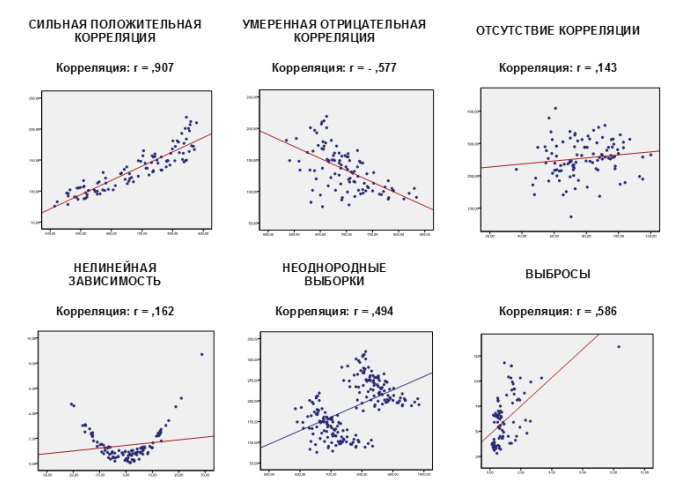

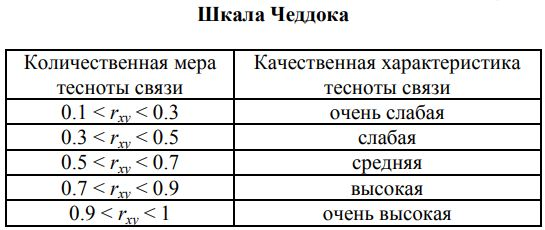

In [9]:
df = df.drop_duplicates()
df['Возраст'] = df['Возраст'].astype("int64")
df['Зарплата'] = df['Зарплата'].astype("int64")

In [10]:
df.info() #с ошибкой, но всё стало форматом int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


In [11]:
df.duplicated().sum()# явные дубликаты удалили

0

***Вывод по разделу***

Загрузили данные, в целом везде тип данных либо int, либо float, в целом, нас устраивает для работы оба варианта. Но зачем нам нули после точки в возрасте и зарплате, перевели всё к int\
Лишних столбцов, например, фамилия/имя нет, поэтому что-то выкидывать по столбцам из таблицы нечего.\
Отсутсвуют пропуски, отедельное спасибо менеджеру и разработчику, подготовили среду\заполняют данные по клиентам корректно.\
Есть явные дубликаты, откуда они появились не понятно, но для обучения они нам не нужны, удалили их.\
Таблица обезличена, в целом данные могут совпадать по разным типам клиентов, поэтому искать неявные дубликаты смысла нет\
Судя по describe явных выбросов в данных нет, нет людей с возрастом 270 лет, максимальная зарплата грустно конечно, 79 тысяч, количество людей в семье 6 человек, тоже выглядит адекватно. Минимальный возраст 18 лет, здесь всё хорошо\
Корреляция близкая к высокой между выплатами и возрастом, но пока попадает в границу средней, поэтому никакой признак не удаляем. (высокая от 0.7, у нас 0.65)


<AxesSubplot:>

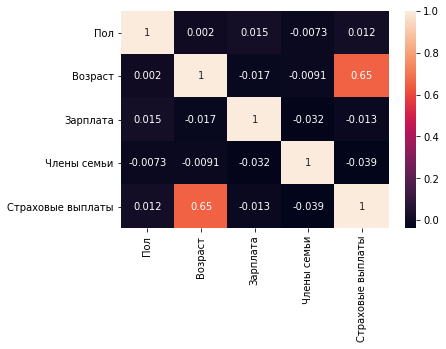

In [12]:
sns.heatmap(df.corr(), annot=True) #как  вариант, чтоб было сразу и быстро видно

<AxesSubplot:>

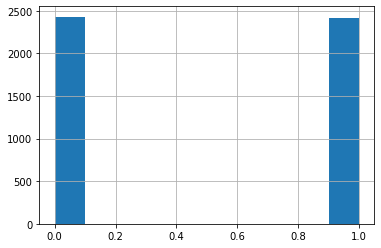

In [13]:
df['Пол'].hist()

<AxesSubplot:>

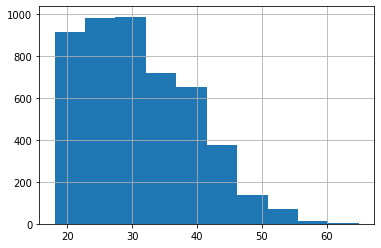

In [14]:
df['Возраст'].hist()

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)\

**Ответ:** не изменится

**Обоснование:** хотел предложить обойтись только практическим путем, но, мне кажется, идея не прокатит =)

Для обоснования этого явления нам надо вспомнить 4 свойства матриц:

$$
(A*B)^{T}=A^{T}*B^{T}
$$

$$
(A*B)^{-1}=B^{-1}*A^{-1}
$$

$$
(A*A)^{-1}=A^{-1}*A=E
$$

$$
AE=EA=A
$$

$$
a = Xw
$$

Признак Х умножим на обратимую матрицу Р 

$$
a1=XPw1
$$

$$
w1 = ((XP)^{T}*XP)^{-1}(XP)^{T}y
$$

Подставим данные w1 из формулы обучения в формулу предсказания и раскроем скобки:

$$
    a1=XP((XP^{T}*XP)^{-1}*(XP)^{T} y = XP(X^{T}*P^{T}*XP)^{-1}X^{T}*P^{T}y
$$

Вынесем за скобки P в степени Т и Р

$$
a1 = XPP^{-1}*(X^{T}*X)^{-1}*(P^{T})^{-1}*P^{T}*X^{T} y
$$

Р на Р в -1 степени дает единичную матрицу, так же Р в степени Т на Р в степени Т и в -1 тоже дает единичную матрицу, а при умножении матрицы на единичную, получается та же матрица, поэтому сократим!

$$
a1 = X(X^{T}*X)^{-1}* X^{T} y
$$

$$
w = (X^T X)^{-1} X^T y
$$

$$
a1=Xw = a
$$

Мы доказали, что а = а1, а значит модель не изменится, теперь проверим на практике!

## Алгоритм преобразования

**Алгоритм**

Мы создадим матрицу, в которая должна быть с одной стороны квадратная, с другой соответствовать нашему количеству признаков, в итоге делаем матрицу 4 на 4 из случайных цифр\
Далее мы проверяем эту матрицу на обратимость и домнажамем наши признаки на эту матрицу

Важный момент, матрица должна подходить под условие, что для неё существует обратная матрица, иначе мы никогда не сможем расшифровать наши данные 
$$
С= Х*Р
$$
$$
Х=С*Р^{-1}
$$

Где Х - исходные признаки\
Р - случайная матрица\
С - зашифрованные признаки




**Обоснование**

Эти действия нам нужны для защиты персональных данных клиентов, на случай, если всё-таки произойдет утечка данных, злоумышленникам они были бы бесполезны (а не как случай в Яндекс.Еде пару лет назад :-) )

## Проверка алгоритма

In [15]:
features = df.drop(["Страховые выплаты"], axis=1)
target = df["Страховые выплаты"]

In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Пол          4847 non-null   int64
 1   Возраст      4847 non-null   int64
 2   Зарплата     4847 non-null   int64
 3   Члены семьи  4847 non-null   int64
dtypes: int64(4)
memory usage: 189.3 KB


In [17]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

Данные разбили, теперь создадим матрицу, затем проверим её на обратимость

In [18]:
matrix = np.random.randint(100,size = (4, 4))

In [19]:
matrix

array([[50,  5, 45, 58],
       [48, 84, 56, 13],
       [96, 47, 63, 26],
       [38, 69,  9, 78]])

In [20]:
matrix_inv = np.linalg.inv(matrix)

In [21]:
matrix_inv

array([[-0.01373143, -0.01669189,  0.02392879,  0.00501627],
       [-0.00921598,  0.00852095, -0.00185581,  0.00605135],
       [ 0.02275783,  0.0197748 , -0.01582544, -0.01494314],
       [ 0.01221637, -0.00168752, -0.00818992,  0.00674778]])

Построим нашу модель, затем умножим признаки на матрицу и построим ещё раз модtль, если они сойдутся, то значит теория оказалась верной 

In [22]:
model = LinearRegression(normalize = True)
model.fit(features, target)
predictions = model.predict(features)
print("R2_score для изначальной модели", round(r2_score(target, predictions),13))

R2_score для изначальной модели 0.4302010046633


In [23]:
features_matrix = features @ matrix

In [24]:
model = LinearRegression(normalize = True)
model.fit(features_matrix, target)
predictions = model.predict(features_matrix)
print("R2_score для изначальной модели", round(r2_score(target, predictions),13))

R2_score для изначальной модели 0.4302010046633


**Вывод**\
Значения сошлись, поэтому в целом мы смогли защитить данные пользователя, умножив наши данные на матрицу, не потеряв в качестве модели.